In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#https://colab.research.google.com/drive/1hVe3v5GhDCcXxMeatWX-fsWZ-vphUwVr?authuser=0#scrollTo=lT59n9AOhyLn

# Importing the Dataset


In [79]:
df=pd.read_csv('Balitmore_salry.csv')

In [80]:
df.head()

,Unnamed: 0,name,jobtitle,agencyid,agency,hire_date,hire_month,hire_year,annualsalary
0,0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,6,2013,11310
1,1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,10,1979,53428
2,2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,9,2006,68300
3,3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,7,2009,62000
4,4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,7,2013,43999


# EDA-Exploratory Data Analysis

In [81]:
df.shape

(18895, 9)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18895 entries, 0 to 18894
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    18895 non-null  int64 
 1   name          18895 non-null  object
 2   jobtitle      18895 non-null  object
 3   agencyid      18895 non-null  object
 4   agency        18895 non-null  object
 5   hire_date     18895 non-null  int64 
 6   hire_month    18895 non-null  int64 
 7   hire_year     18895 non-null  int64 
 8   annualsalary  18895 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.3+ MB


In [83]:
df.describe()

,Unnamed: 0,hire_date,hire_month,hire_year,annualsalary
count,18895.000000,18895.000000,18895.000000,18895.000000,18895.000000
mean,9519.609262,15.764806,6.369675,2004.078328,39547.804763
std,5467.766632,8.386260,2.948706,10.391949,24865.587963
min,0.000000,1.000000,1.000000,1952.000000,0.000000
25%,4799.500000,9.000000,5.000000,1998.000000,11310.000000
50%,9525.000000,16.000000,6.000000,2007.000000,36203.000000
75%,14253.500000,22.000000,8.000000,2013.000000,60300.000000
max,18980.000000,31.000000,12.000000,2014.000000,148200.000000


In [84]:
df.columns

Index(['Unnamed: 0', 'name', 'jobtitle', 'agencyid', 'agency', 'hire_date',
       'hire_month', 'hire_year', 'annualsalary'],
      dtype='object')

In [85]:
df.isnull().sum()

Unnamed: 0      0
name            0
jobtitle        0
agencyid        0
agency          0
hire_date       0
hire_month      0
hire_year       0
annualsalary    0
dtype: int64

In [86]:
df.agencyid

0        W02200
1        A03031
2        A29005
3        A65026
4        A99416
          ...  
18890    W02235
18891    W02629
18892    A99416
18893    A99262
18894    A50206
Name: agencyid, Length: 18895, dtype: object

In [87]:
df.agencyid.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02400      1
W02595      1
W07901      1
W02313      1
W02339      1
Name: agencyid, Length: 1177, dtype: int64

In [88]:

agency_id_name_mapping = df.groupby('agencyid')['agency'].agg(list)
agency_id_name_mapping

agencyid
A01001    [Mayors Office, Mayors Office, Mayors Office, ...
A01020    [Mayor's Office, Mayor's Office, Mayor's Offic...
A01030    [Mayors Office, Mayors Office, Mayors Office, ...
A02001    [City Council, City Council, City Council, Cit...
A02002    [City Council, City Council, City Council, Cit...
                                ...                        
W02698                                       [Youth Summer]
W02699                                       [Youth Summer]
W07900    [Youth Temp Adult, Youth Temp Adult, Youth Tem...
W07901                                   [Youth Temp Adult]
W07905                 [Youth Temp Adult, Youth Temp Adult]
Name: agency, Length: 1177, dtype: object

<Axes: >

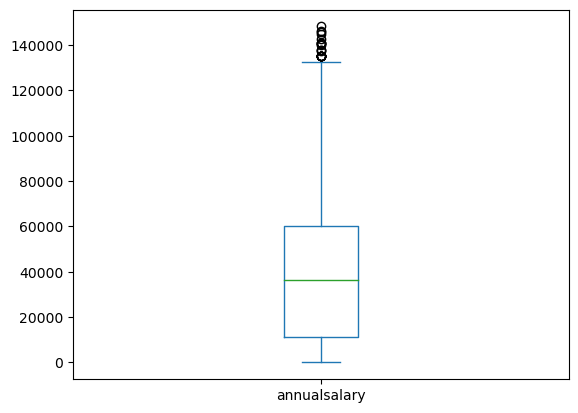

In [89]:
df.annualsalary.plot.box()

<Axes: >

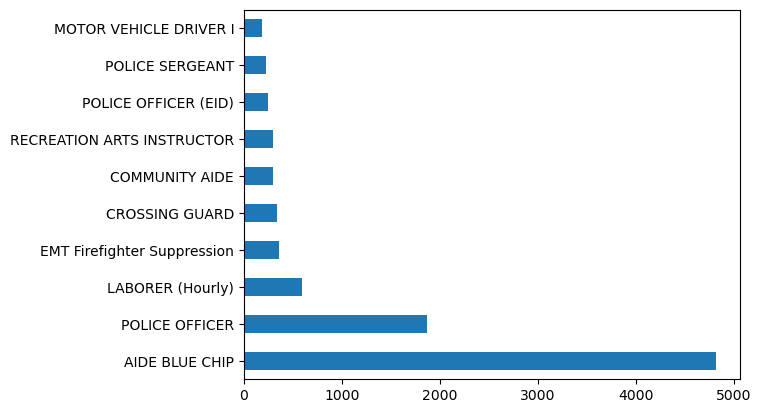

In [90]:
#plotting top 10 jobs based on hiring
df.jobtitle.value_counts(ascending=False).head(10).plot(kind='barh')


<Axes: ylabel='jobtitle'>

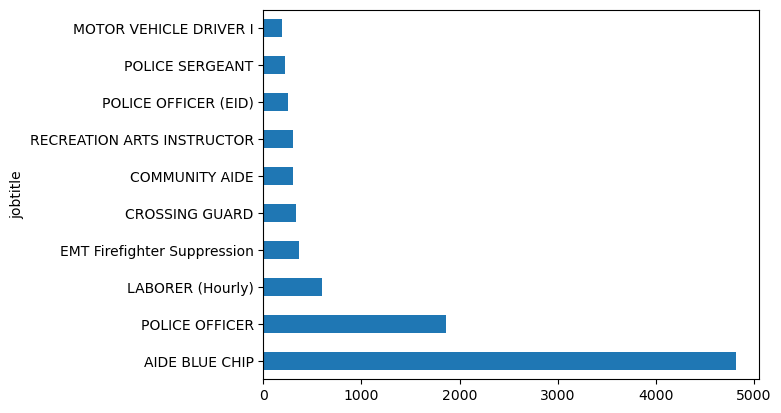

In [91]:
#plot top 10 jobs with highest salary
df.groupby(['jobtitle'])['annualsalary'].count().sort_values(ascending=False).head(10).plot(kind='barh')


<Axes: ylabel='agency'>

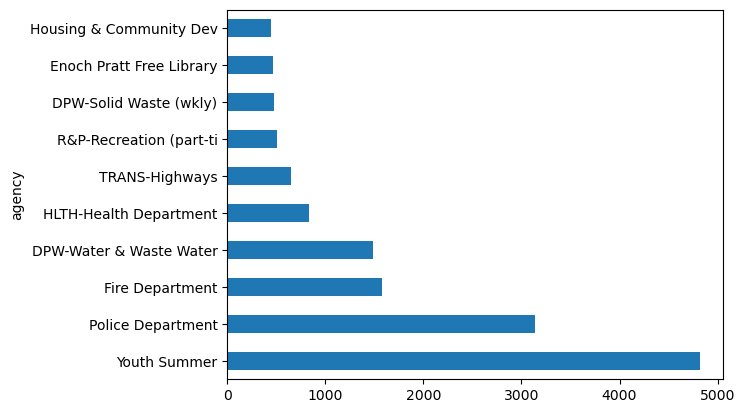

In [92]:
#plot top 10 Agency that has highest number of employees
df.groupby(['agency'])['name'].count().sort_values(ascending=False).head(10).plot(kind='barh')

In [93]:
df.head()


,Unnamed: 0,name,jobtitle,agencyid,agency,hire_date,hire_month,hire_year,annualsalary
0,0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,6,2013,11310
1,1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,10,1979,53428
2,2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,9,2006,68300
3,3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,7,2009,62000
4,4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,7,2013,43999


Text(0, 0.5, 'Annual-Salary')

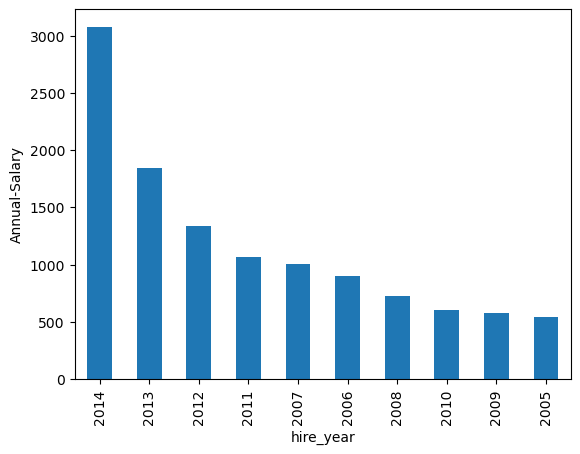

In [94]:
#plot Highest Salary vs year graph
df.groupby(['hire_year'])['annualsalary'].count().sort_values(ascending=False).head(10).plot(kind='bar')

# Adding y-axis label
plt.ylabel('Annual-Salary')




Text(0, 0.5, 'No. of Employees')

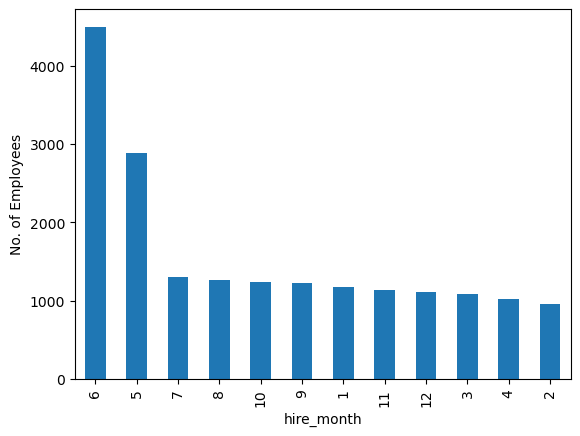

In [95]:
#plot a graph to check which month most of the people are hired
df.groupby(['hire_month'])['name'].count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("No. of Employees")

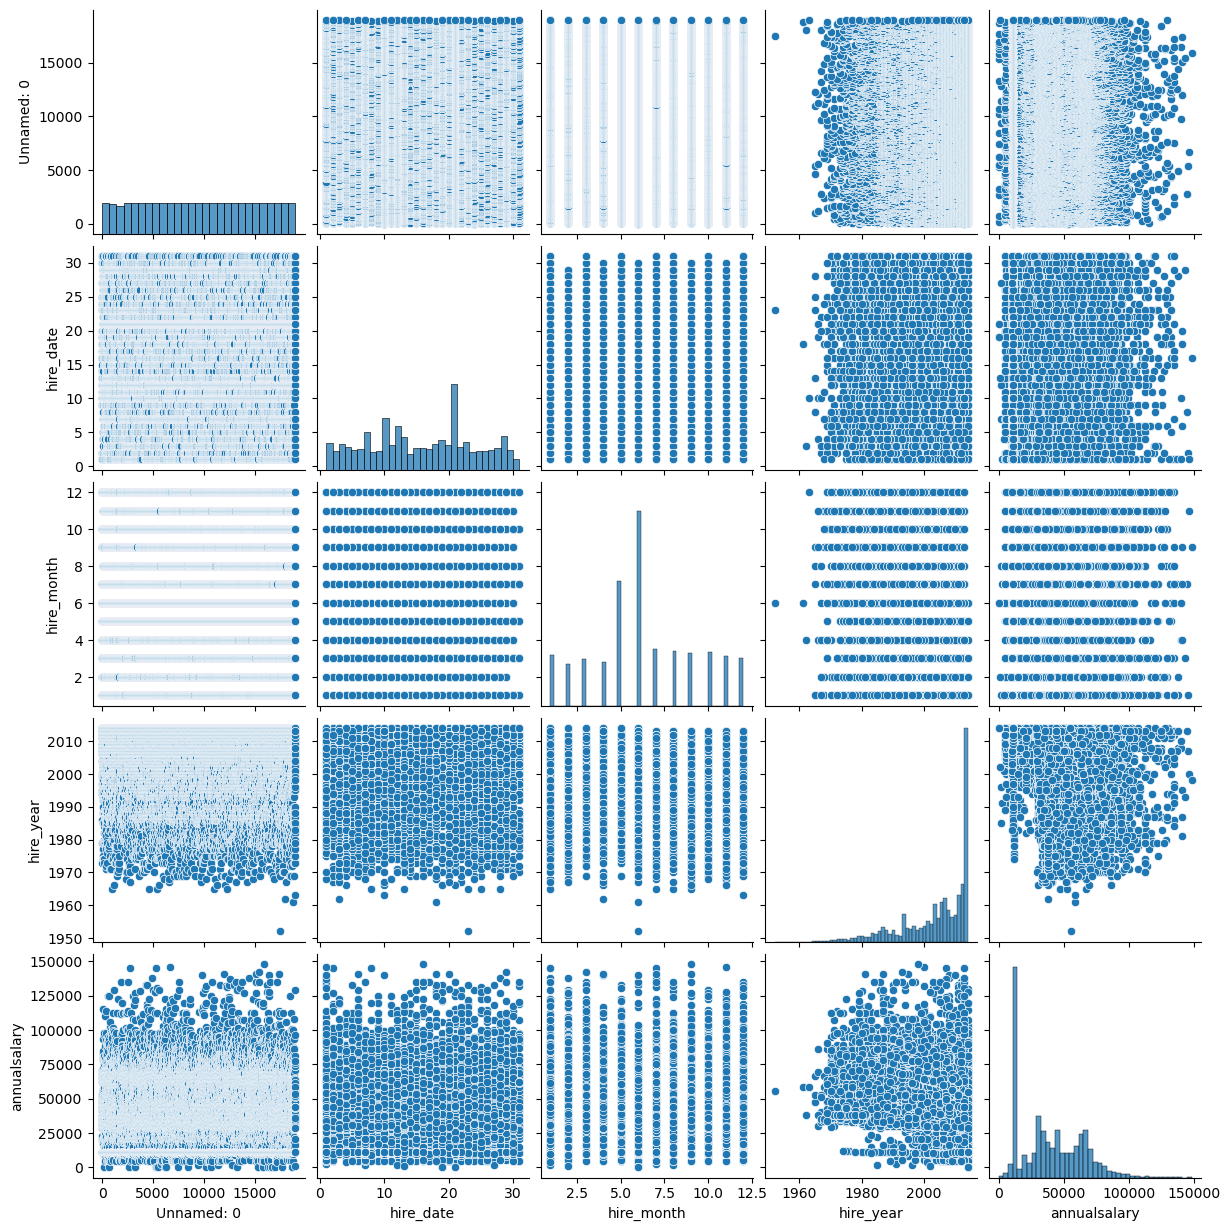

In [96]:
#plot a pairplot
sns.pairplot(df)

<Axes: >

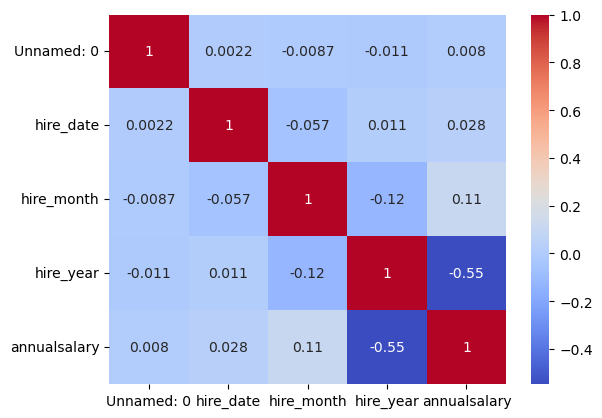

In [97]:
#plot heatmap
newdf=df.drop(['name','agency','agencyid','jobtitle'],axis=1)
sns.heatmap(newdf.corr(),annot=True,cmap='coolwarm')

In [98]:
df.head()

,Unnamed: 0,name,jobtitle,agencyid,agency,hire_date,hire_month,hire_year,annualsalary
0,0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,6,2013,11310
1,1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,10,1979,53428
2,2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,9,2006,68300
3,3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,7,2009,62000
4,4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,7,2013,43999


In [99]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Machine Learning

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Feature columns (excluding the columns to be dropped)
X = df.drop(['name', 'agency', 'agencyid', 'jobtitle', 'annualsalary'], axis=1).values

# Target variable (annual salary)
y = df['annualsalary'].values

In [101]:
X

array([[  10,    6, 2013],
       [  24,   10, 1979],
       [  25,    9, 2006],
       ...,
       [  17,   12, 2013],
       [  23,    1, 2013],
       [  15,   10, 1979]])

In [102]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42)

# Scale the features and the target variable
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scaler to the training features and transform both training and test data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Fit the scaler to the target and transform both training and test target data
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Make y_train a 2D array for scaling
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()  # Same for y_test


In [103]:
#model
model=SVR(kernel='rbf')

In [104]:
# Train the model with scaled data
model.fit(X_train_scaled, y_train_scaled)

SVR()

In [105]:
# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to get back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the model's performance
model_score = model.score(X_test_scaled, y_test_scaled)

In [114]:
y_pred

array([29718.28138325, 29719.6242186 , 40966.08716065, ...,
       64606.88707863, 55481.58936791, 60713.42586454])

In [106]:
#Performace of the Model
model.score(X_test_scaled,y_test_scaled)

0.47133905739555737

In [107]:
#Accuracy
from sklearn.metrics import r2_score
r2_score(y_test_scaled,y_pred_scaled)

0.47133905739555737

In [113]:
#PREDICTING SALARY FOR different dates
def conv(i_date,i_month,i_year):
    X_pred = scaler_X.transform(np.array([[i_date, i_month, i_year]]))
    y_pred_scale=model.predict(X_pred)
    y_predd = scaler_y.inverse_transform(y_pred_scale.reshape(-1, 1)).flatten()
    print("Salary:",y_predd)
i_date = int(input("Enter date in the format dd - "))
i_month = int(input("Enter month in the format mm- "))
i_year = int(input("Enter year in the format yyyy - "))    
conv(i_date,i_month,i_year)    


Enter date in the format dd - 11
Enter month in the format mm- 11
Enter year in the format yyyy - 2000
Salary: [60801.02743914]


In [115]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)
with open('scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)


In [119]:
 max(df.hire_year)

2014

In [72]:
df.head(50)

,name,jobtitle,agencyid,agency,hire_date,hire_month,hire_year,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,6,2013,11310
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,10,1979,53428
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,9,2006,68300
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,7,2009,62000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,7,2013,43999
5,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology,1,5,2013,52000
6,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department,30,3,2011,62175
7,"Abdi,Ezekiel W",POLICE SERGEANT,A99127,Police Department,14,6,2007,70918
8,"Abdul Adl,Attrice A",RADIO DISPATCHER SHERIFF,A38410,Sheriff's Office,2,9,1999,42438
9,"Abdul Aziz,Hajr E",AIDE BLUE CHIP,W02097,Youth Summer,18,6,2014,11310
